# 1. Get some cutouts

In [11]:
from lensedquasarsutilities.model_PSF_from_field import download_and_extract, estimate_psf_from_extracted_h5
from lensedquasarsutilities.formatting import get_J2000_name

ra, dec = 145.3439, 5.3066
name = get_J2000_name(ra, dec)
print('working on', name)
workdir = f'/tmp/{name}'

savepath_fits, savepath_cutouts_h5 = download_and_extract(ra, dec, workdir, survey='legacysurvey')
savepath_fits, savepath_cutouts_h5

working on J0941+0518
INFO: Query finished. [astroquery.utils.tap.core]
File saved at: /tmp/J0941+0518/cutouts_legacysurvey_J0941+0518.fits


(PosixPath('/tmp/J0941+0518/cutouts_legacysurvey_J0941+0518.fits'),
 PosixPath('/tmp/J0941+0518/cutouts_legacysurvey_J0941+0518_cutouts.h5'))

The above 
- queried Gaia to know what field size is necessary to have at least one star that can be used to model the PSF in the field. 
- downloaded all the files available in the specified survey in a fits file.
- extracted cutouts of the stars that can be used for PSF, and of the lens, preserving the WCS information.

# 2. Get a pixelated PSF model with STARRED

In [12]:
estimate_psf_from_extracted_h5(savepath_cutouts_h5)

/home/fred/Documents/starred/starred/psf/loss.py:124: UserWarning: lambda is not normalized. Provide the weight map !
  warnings.warn('lambda is not normalized. Provide the weight map !')
optax.adabelief: 100%|████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:01<00:00, 1170.66it/s]
/home/fred/Documents/starred/starred/psf/loss.py:124: UserWarning: lambda is not normalized. Provide the weight map !
  warnings.warn('lambda is not normalized. Provide the weight map !')
optax.adabelief: 100%|████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:01<00:00, 1238.66it/s]
/home/fred/Documents/starred/starred/psf/loss.py:124: UserWarning: lambda is not normalized. Provide the weight map !
  warnings.warn('lambda is not normalized. Provide the weight map !')
optax.adabelief: 100%|████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:01<00:00, 1228.89it/s]
/home/fred/Do

The above added the narrow PSF to the hdf5 file already containing the cutouts. We can use it to model the lensed quasar.

# 3. Model the lensed quasar

INFO: Query finished. [astroquery.utils.tap.core]


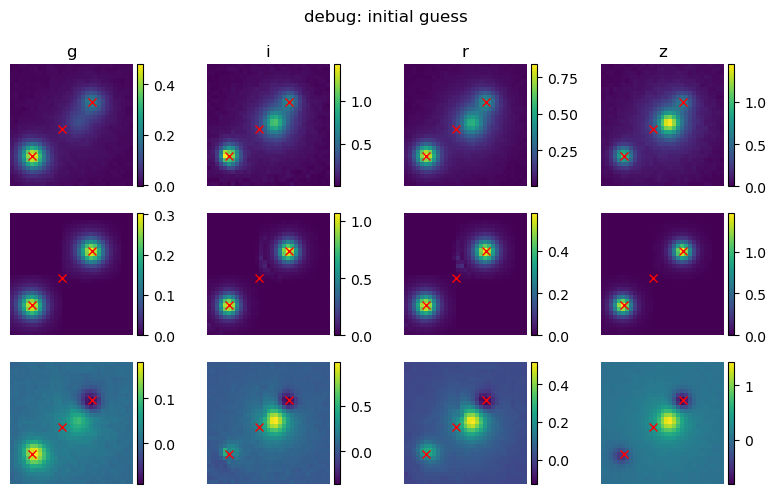

In [13]:
from lensedquasarsutilities.image_fitting import prepare_simple_lens_model_from_h5
models = prepare_simple_lens_model_from_h5(savepath_cutouts_h5, debug=True)

The above
- looked for the gaia positions of the 2 images. (You can provide your own by providing a list of `SkyCoords` to `prepare_simple_lens_model_from_h5`, `imagecoords`.)
- set up a simple model with 2 PSFs at these positions, as well as a sersic in the middle.

## 3.1 least squares

### 3.1 A Only the PSFs

Used params from least-squares optimization


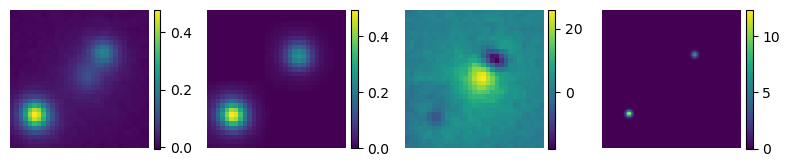

Used params from least-squares optimization


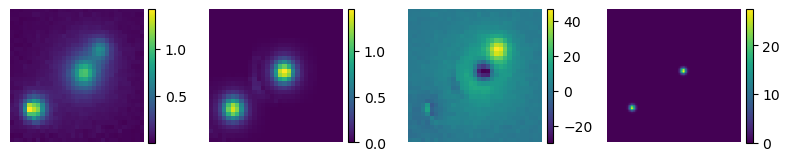

Used params from least-squares optimization


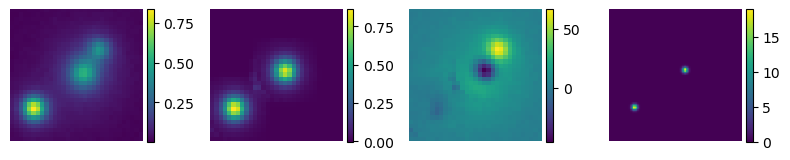

Used params from least-squares optimization


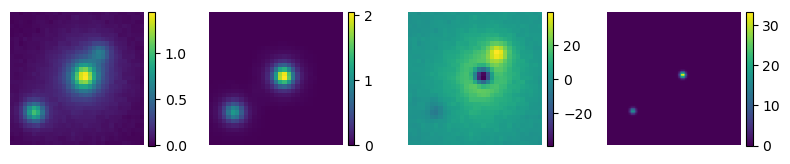

In [14]:
for band, model in models.items():
    model.optimize_no_galaxy()
    model.plot_model_no_galaxy()
    

## 3.1 B PSFs and galaxy

Used params from least-squares optimization


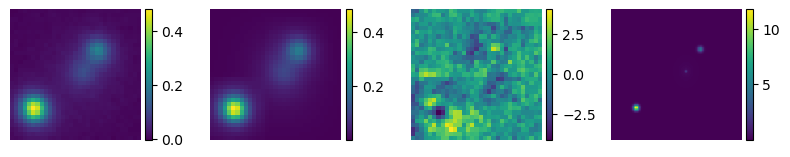

Used params from least-squares optimization


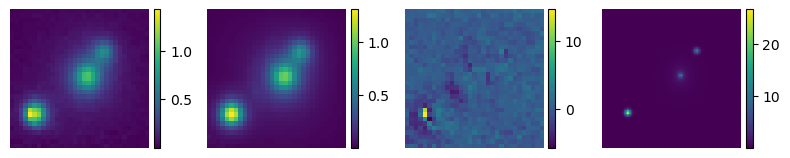

Used params from least-squares optimization


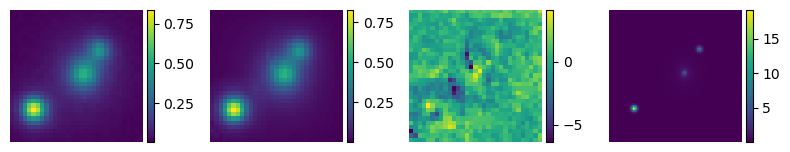

Used params from least-squares optimization


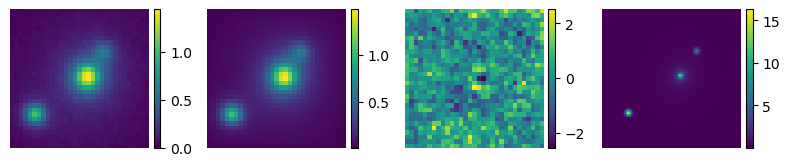

In [15]:
for band, model in models.items():
    model.optimize_with_galaxy()
    model.plot_model_with_galaxy()